#### 공사비의 공사번호 기준 설비 카운팅

##### 레코드 제거
* 전선 갯 수가 0 또는 11 이상
* 전주 갯 수가 0 또는 10 이상

In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.aiddd.data_manager import read_data, write_data

# 한글처리 지원
plt_settings()

#### 데이터 불러오기

In [2]:
_start = datetime.now()

# 제공받은 설비 데이터
provided_data = {
    'line': read_data('2nd provide line'),
    'pole': read_data('2nd provide pole'),
    'sl': read_data('2nd provide sl')
}

# 1차 전처리된 공사비 데이터
df_cons = read_data('2nd pp cons-1st')

print(
    f'Total Elapsed Time for Data Load: {datetime.now() - _start}\n'
    'Provided Data Shape:', end=' '
)
for _key in provided_data.keys():
    print(f'{_key} {provided_data[_key].shape}', end=', ')
print(f'\nPreprocessing Data Shape: {df_cons.shape}')

Total Elapsed Time for Data Load: 0:01:09.350601
Provided Data Shape: line (39861, 77), pole (38390, 63), sl (22531, 57), 
Preprocessing Data Shape: (15894, 15)


#### 공사번호별 설비 갯 수 계산

In [3]:
# nodpcn: number of devices per construction number(공사번호별 장치 갯 수)
# cnts: counts
for _key in provided_data.keys():
    _series_nodpcn = provided_data[_key]['공사번호'].value_counts()
    _column_name = f'{_key}_cnts'
    df_cons = pd.merge(
        df_cons, _series_nodpcn.rename(_column_name),
        left_on='공사번호', right_on=_series_nodpcn.index,
        how='left'
    )
    # 장치 갯 수가 없는 공사번호는 np.NaN이 들어가는데, 이 값을 0으로 변경
    df_cons[_column_name].fillna(0, inplace=True)
    # 정수값으로 변경
    df_cons[_column_name] = df_cons[_column_name].astype(int)

In [4]:
training_data_conditions = \
    (df_cons['pole_cnts'] > 0) & (df_cons['pole_cnts'] <= 10) & \
    (df_cons['line_cnts'] > 0) & (df_cons['line_cnts'] <= 11)
    
df_cons[~training_data_conditions].shape

(763, 18)

In [5]:
# 763개면 예외로 무시 가능하기 때문에 제거
df_training = df_cons[training_data_conditions]

In [6]:
write_data('2nd pp counts-base-on-cons-1st', df_training)

#### 차트로 확인

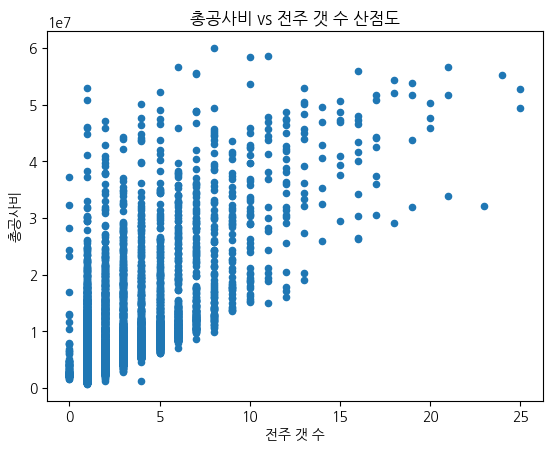

In [7]:
df_cons.plot.scatter(x='pole_cnts', y='총공사비')
plt.xlabel('전주 갯 수')
plt.ylabel('총공사비')
plt.title('총공사비 vs 전주 갯 수 산점도')
plt.show()

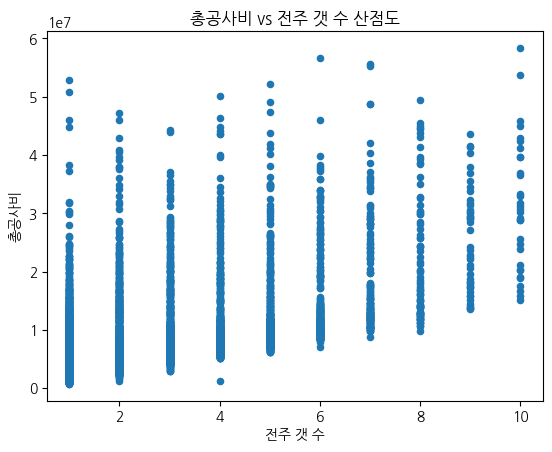

In [8]:
df_training.plot.scatter(x='pole_cnts', y='총공사비')
plt.xlabel('전주 갯 수')
plt.ylabel('총공사비')
plt.title('총공사비 vs 전주 갯 수 산점도')
plt.show()

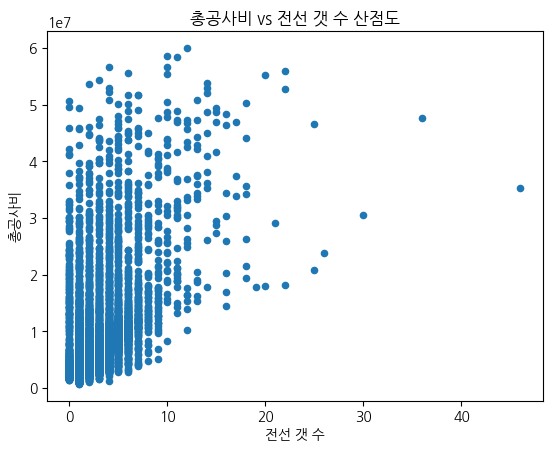

In [9]:
df_cons.plot.scatter(x='line_cnts', y='총공사비')
plt.xlabel('전선 갯 수')
plt.ylabel('총공사비')
plt.title('총공사비 vs 전선 갯 수 산점도')
plt.show()

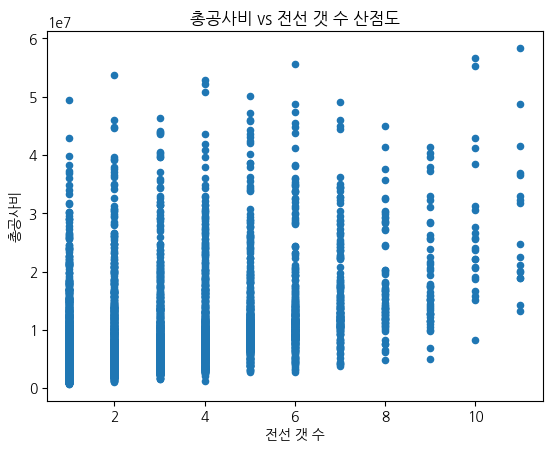

In [10]:
df_training.plot.scatter(x='line_cnts', y='총공사비')
plt.xlabel('전선 갯 수')
plt.ylabel('총공사비')
plt.title('총공사비 vs 전선 갯 수 산점도')
plt.show()